# Bibliothèques

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 51)
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn : apprentissage automatique
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config # Pour afficher les pipelines
set_config(display='diagram')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# import warnings
# warnings.filterwarnings("ignore")

# Catalogue des fonctions

In [4]:
# Datavisualisation

def analyse_dtypes_object(data):
    return data.select_dtypes(include=('object')).nunique().sort_values(ascending=False)

def analyse_target(data) : 
    number = data.readmitted.value_counts()
    percentage = data.readmitted.value_counts(normalize=True).round(3)*100
    analyse_target = {'number': number, '%': percentage}
    analyse_target_1 = pd.DataFrame(analyse_target)
    return analyse_target_1

def map_missing_values(data):
    plt.figure(figsize=(17,7))
    heatmap = sns.heatmap(data.isna(), cbar=False, cmap="Blues")
    heatmap.set_title('Heatmap des valeurs manquantes du dataset',
    fontdict={'fontsize':18}, pad=16);

def check_null_values(df):
    nb_null = df.isnull().sum().sort_values(ascending=False).head(10)
    percentage_null = df.isnull().sum()*100/len(df)
    percentage_null = percentage_null.sort_values(ascending=False).head(10).round(1)
    null = {'nombre_null' : nb_null,'%_null' : percentage_null}
    data = pd.DataFrame(data = null)
    return data
    
# Preprocessing

def columns_with_interrogation(df):
    list = []
    [list.append(i) for i in df.columns if np.any(df[i] == '?')]
    return list

def modalites(df):
    for i in df.columns:
        print(f'{i}: {df[i].unique()}')
        print(f'Nb de modalités : {df[i].value_counts().count()}\n')

# Import du dataset

In [6]:
data = pd.read_csv('diabetic_data_130US_hospital.csv', sep=';')

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Principales informations

## Source et vue d'ensemble du dataset  

Ce dataset est hébergé sur le site opensource du "Center for Machine Learning and Intelligent Systems" de l'Université de Californie, qui regroupe des données permettant de faire du machine learning. 

Notre dataset traite du diabète et représente les données sur 10 ans (1999-2008), de 130 hôpitaux américains, des patients ayant été admis (patients hospitalisés) pour ce type de problème : https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

Le dataset compte 101766 exemples et 50 features. Chaque ligne correspond à l'admission unique d'un patient. A noter qu'un patient peut être admis plusieurs fois. Le nombre de patients total ayant été admis sur la période est de 71518. 


In [4]:
data.shape

(101766, 50)

In [5]:
data['encounter_id'].nunique(), data['patient_nbr'].nunique()

(101766, 71518)

## Quelles sont mes variables ?

Le dataset présente des variables relatives aux caractéristiques physiques du patient, à la nature de sa prise en charge médicale (spécialité du médecin, temps d'hospitalisation...), à ses traitements médicaux et à ses résultats de tests de sanguins. 

Voici le détail : 

**encounter_id** : identifiant unique de l'admission 

**patient_nbr** : identifiant unique du patient  

**race** : 'Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'

**gender** : homme ou femme  

**age** : groupé par des intervalles de 10 années  

**weight** : poids du patient en livre (A TRADUIRE EN KG)  

**admission_type_id** : id correspondant à 8 modalités (Emergency, Urgent, Elective, Newborn, Not Available, NULL, Trauma Center, Not Mapped  (voir dans le détail à quoi cela correspond))  

**discharge_disposition_id** : lieu de transfert après guérison - 26 modalités (voir fichier excel) - A la maison, dans un autre service, etc.    

**admission_source_id** : raison de l'admission (recommandation médicale/urgence/enfant malade..) - 17 modalités.   

**time_in_hospital** : nombre de jours entre l'admission et la sortie (va de 1 à 14 jours) 

**payer_code** : unique ID assigné à chaque compagnie (RETROUVER NOM ENTIER DE CHAQUE MODALITE)   

**medical_specialty** : correspond à la spécialité du médecin qui a pris en charge le patient à son arrivée - 73 modalités 

**num_lab_procedures** : nombre de tests labo faits pendant l'hospitalisation (analyes médicales -> vérifier)

**num_procedures** : nombre de procédures (interventions) autre que les tests en labo  

**num_medications** : nombre de médicaments administrés lors de l'encounter (ou Number of distinct generic names administered during the encounter) - A VERIFIER   

**number_outpatient** : Nombre de visites ambulatoires du patient dans l'année précédant la consultation (consultation externe)   

**number_emergency** : Nombre de visites aux urgences du patient dans l'année précédant la consultation  

**number_inpatient** : Nombre de visites hospitalières du patient dans l'année précédant la consultation  

**diag_1/2/3** : Premier, second et diagnostique additionnel. Correspond au code ICD9 (documentation pour la classification : https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp/physicians/diagnostic-code-descriptions-icd-9)  

**number_diagnoses** : nombre de diagnostics déclarés dans le système  

**max_glu_serum** : 4 modalités - Glycémie à jeun (A VERIFIER)  

**A1Cresult** : HbA1c = hémoglobine glyquée  

**Medications : metformin -> metformin-pioglitazone** : types de médicaments pris avec 4 modalités (régulier, pas pris, augmenté, diminué)   

**change** : indique s'il y a eu un changement dans la traitement pour le diabète, soit dans la posologie, soit dans le nom du médicament  

**diabetesMed** : prescription de médicaments pour le diabète ou pas  

**readmitted** :  le patient a-t-il été réadmis au bout de 30 jours max, à plus de 30 jours ou pas réadmis ?   

In [6]:
#############
# A faire ? Requalifier les colonnes pour une meilleure compréhension ?
#############

data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
# Indique la nature et le nombre de modalités pour chacune des colonnes

####################
# A FAIRE : ajouter un paramètre dans la fonction permettant de sélectionner les colonnes dont on veut avoir le détail
# -> def modalites(df, columns=[]):
####################

def modalites(df):
    for i in df.columns:
        print(f'{i}: {df[i].unique()}')
        print(f'Nb de modalités : {df[i].value_counts().count()}\n')

modalites(data)

encounter_id: [  2278392    149190     64410 ... 443854148 443857166 443867222]
Nb de modalités : 101766

patient_nbr: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
Nb de modalités : 71518

race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Nb de modalités : 6

gender: ['Female' 'Male' 'Unknown/Invalid']
Nb de modalités : 3

age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Nb de modalités : 10

weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Nb de modalités : 10

admission_type_id: [6 1 2 3 4 5 8 7]
Nb de modalités : 8

discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Nb de modalités : 26

admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Nb de modalités : 17

time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Nb de modalités : 14

payer_

Nb de modalités : 790

number_diagnoses: [ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
Nb de modalités : 16

max_glu_serum: ['None' '>300' 'Norm' '>200']
Nb de modalités : 4

A1Cresult: ['None' '>7' '>8' 'Norm']
Nb de modalités : 4

metformin: ['No' 'Steady' 'Up' 'Down']
Nb de modalités : 4

repaglinide: ['No' 'Up' 'Steady' 'Down']
Nb de modalités : 4

nateglinide: ['No' 'Steady' 'Down' 'Up']
Nb de modalités : 4

chlorpropamide: ['No' 'Steady' 'Down' 'Up']
Nb de modalités : 4

glimepiride: ['No' 'Steady' 'Down' 'Up']
Nb de modalités : 4

acetohexamide: ['No' 'Steady']
Nb de modalités : 2

glipizide: ['No' 'Steady' 'Up' 'Down']
Nb de modalités : 4

glyburide: ['No' 'Steady' 'Up' 'Down']
Nb de modalités : 4

tolbutamide: ['No' 'Steady']
Nb de modalités : 2

pioglitazone: ['No' 'Steady' 'Up' 'Down']
Nb de modalités : 4

rosiglitazone: ['No' 'Steady' 'Up' 'Down']
Nb de modalités : 4

acarbose: ['No' 'Steady' 'Up' 'Down']
Nb de modalités : 4

miglitol: ['No' 'Steady' 'Down' 'Up']
Nb de 

## La target : réadmission ou non du patient

Notre target est la variable 'readmitted' : il s'agira de prédire si, au regard des caractéristiques ci-dessus, le patient sera réadmis ou non ultérieurement dans le service diabétologie.

Nous avons là deux possibilités :  
    - effectuer une classification mutliclasse (dans ce cas, vérifier le déséquilibre des classes et le corriger avec la méthode Smote par exemple)   
    - rassembler la target en une variable binaire (0 = pas de réadmission / 1 = réadmission (>30 et <30))

In [8]:
data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

# Traitement nécessaire avant exploration des données

## Analyse des caractères anormaux du dataframe

Nous observons des "?" : nous les remplaçons par des Nan.
Nous observons de nombreux "None" : pour l'instant, nous ne les changeons pas en null (donc pas de drop) car elles font partie de modalités de deux features importantes (max_glu_serum et A1Cresult). 

**Questions** : 
- faut-il supprimer les "-" de la variable "medical_specialty" ? 
- faut-il bien considérer les None comme des valeurs nulles ? 

In [7]:
##########
# A FAIRE : refactoriser le code en mettant les 3 étapes dans une fonction def
##########

# Quelles sont les colonnes qui contiennent des "?"

def columns_with_interrogation(df): 
    list = []
    [list.append(i) for i in df.columns if np.any(df[i] == '?')] # list comprehension  
    return list

# Combien de lignes par colonnes sont concernées ? 

interrogation = columns_with_interrogation(data)

for i in interrogation:
    number = data[i] == '?'
    total = number.sum()
    print(f'La colonne "{i}" en contient : {total}')

La colonne "race" en contient : 2273
La colonne "weight" en contient : 98569
La colonne "payer_code" en contient : 40256
La colonne "medical_specialty" en contient : 49949
La colonne "diag_1" en contient : 21
La colonne "diag_2" en contient : 358
La colonne "diag_3" en contient : 1423


In [8]:
# Remplacement des ? par des nan

data = data.replace({'?' : np.nan})
columns_with_interrogation(data) # on vérifie qu'on n'a plus de colonnes impactées

[]

In [11]:
# Vérification de la présence des None

def columns_with_None(data):
    list = []
    [list.append(i) for i in data.columns if np.any(data[i] == 'None')] # list comprehension  
    return list

None_columns = columns_with_None(data)

for i in None_columns:
    number = data[i] == 'None'
    total = number.sum()
    print(f'La colonne "{i}" en contient : {total}')

La colonne "max_glu_serum" en contient : 96420
La colonne "A1Cresult" en contient : 84748


In [12]:
# les "?" ont bien été remplacés par des Nan

data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
# La modalité "Unknown/Invalid" de colonne 'gender' contient un caratère spécial, et est de toute façon à considérer 
# comme un Null, donc nous la qualifions en nan.  

data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [9]:
data = data.replace({'Unknown/Invalid' : np.nan})

In [15]:
data['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

## Suppression de l'Id

Variable integer inutile qui va parasiter notre modèle.

In [10]:
data = data.drop(columns=['encounter_id'])

## Vérification des doublons

On ne constate aucun doublon.

In [11]:
data.duplicated(keep=False).sum()

0

## Encodage de la target

Notre intérêt ici est de savoir si le patient, suite à son séjour hospitalier, risque d'être de nouveau hospitalisé. Nous ne prenons pas en compte la granularité de temps (à moins ou plus de 30 jours). Nous optons donc pour une variable binaire et non multiclasse.

In [12]:
data = data.replace({'readmitted' : {'NO' : 0, '>30' : 1, '<30' : 1}})

In [13]:
# nb d'exemples pour chaque modalité de la colonne readmitted

data.readmitted.value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

# Itération 1 : baseline

**Objectif** : créer un modèle prédictif simple, basé sur une analyse exploratoire et une data préparation sommaires afin de comprendre un peu mieux la structure du dataset et de pouvoir élaborer une ébauche de l'application demandée. 

## Analyse de forme des données

**- Target** : readmitted - la classe est équilibrée (0 : 53% / 1 : 46%)  
**- Lignes et colonnes** : 101766 lignes et  49 colonnes  
**- Types de variables** : int64 = 13, object = 36 dont 5 avec plus de 10 modalités  
**- Valeurs manquantes**: 7 colonnes ont des valeurs manquantes dont 'weight' à hauteur de 96%. 'medical_specialty' et 'payer_code' manquent respectivement à 50% et 40%. 

### Structure du dataset

In [20]:
# On travaille sur une copie du dataset initial

baseline = data.copy()

In [21]:
# La target 'readmitted'

def analyse_target(data) : 
    number = data.readmitted.value_counts()
    percentage = data.readmitted.value_counts(normalize=True).round(3)*100
    analyse_target = {'number': number, '%': percentage}
    analyse_target_1 = pd.DataFrame(analyse_target)
    return analyse_target_1
    
analyse_target(baseline)

,number,%
0,54864,53.9
1,46902,46.1


**Question** : Quel est le degré de documentation du code qui est demandé ? Exemple documentation de la fonction ci-dessus.

In [22]:
# Nombre de Lignes et colonnes

baseline.shape

(101766, 49)

### Types de variables

A ce stade, nous avons 36 variables qualitatives dont 5 contiennent plus de 10 modalités, et 13 quantitatives.  

In [23]:
baseline.dtypes.value_counts()

object    36
int64     13
dtype: int64

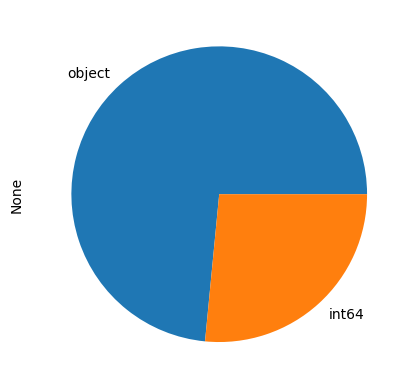

In [24]:
# Répartition du type de variables

##################
# A faire : intégrer les valeurs dans le pie et retirer le None
#################

baseline.dtypes.value_counts().plot.pie()
plt.show()

In [25]:
def analyse_dtypes_object(data):
    return data.select_dtypes(include=('object')).nunique().sort_values(ascending=False)

analyse_dtypes_object(baseline)

diag_3                      789
diag_2                      748
diag_1                      716
medical_specialty            72
payer_code                   17
age                          10
weight                        9
race                          5
glipizide                     4
glyburide-metformin           4
insulin                       4
miglitol                      4
acarbose                      4
rosiglitazone                 4
pioglitazone                  4
glyburide                     4
chlorpropamide                4
nateglinide                   4
repaglinide                   4
metformin                     4
glimepiride                   4
A1Cresult                     4
max_glu_serum                 4
tolazamide                    3
acetohexamide                 2
glipizide-metformin           2
change                        2
metformin-pioglitazone        2
metformin-rosiglitazone       2
glimepiride-pioglitazone      2
diabetesMed                   2
troglita

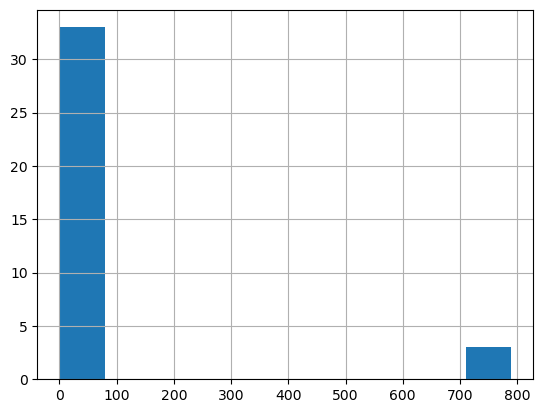

In [26]:
# Affiche le plot des modalités pour toutes les variables catégorielles

#############
# A FAIRE : reprendre le graph avec d'autres bins pour plus de précision sur l'intervalle [0 - 100]
############

baseline.select_dtypes(include=('object')).nunique().hist()
plt.show()

### Valeurs nulles

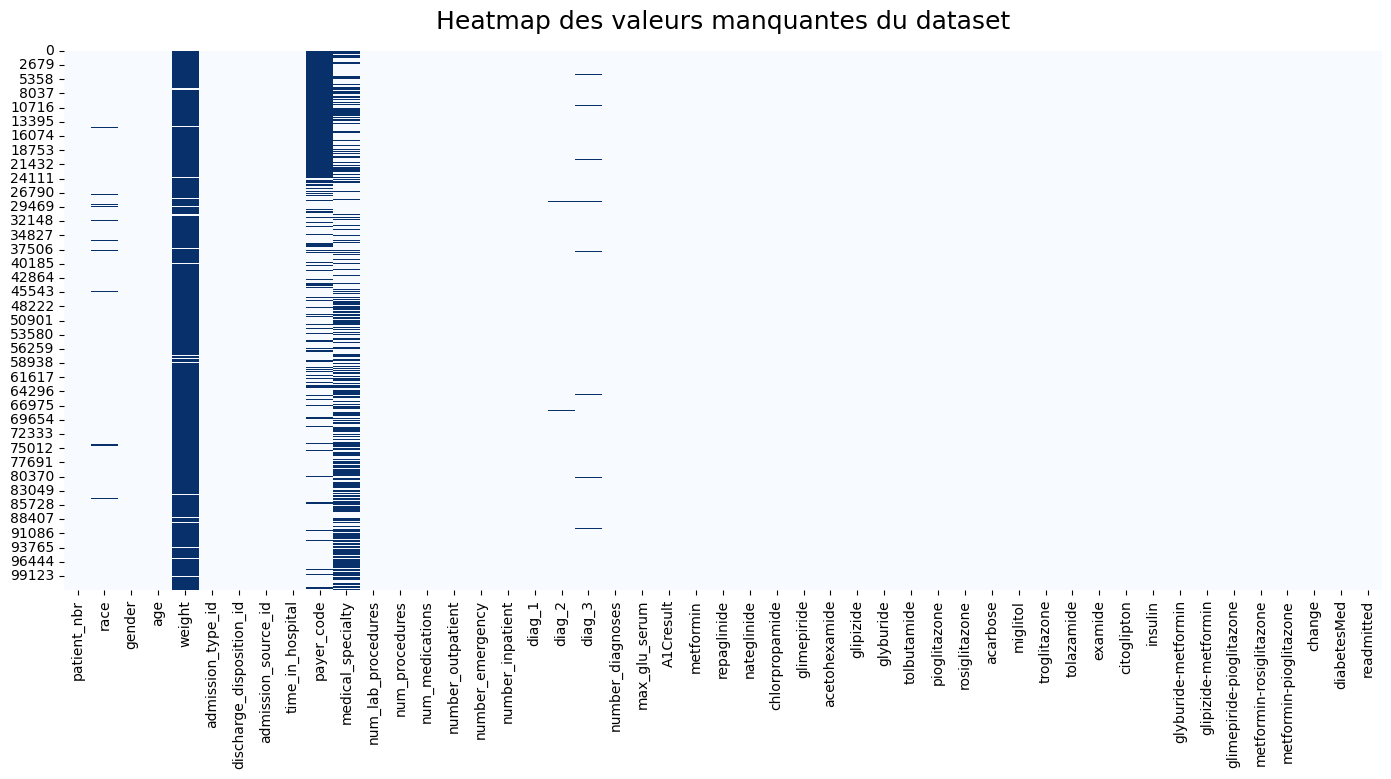

In [27]:
def map_missing_values(data):
    plt.figure(figsize=(17,7))
    heatmap = sns.heatmap(data.isna(), cbar=False, cmap="Blues")
    heatmap.set_title('Heatmap des valeurs manquantes du dataset',
    fontdict={'fontsize':18}, pad=16);
    
map_missing_values(baseline)

In [28]:
# On affiche les valeurs nulles en ordre desc des 10 premières colonnes

def check_null_values(df):
    nb_null = df.isnull().sum().sort_values(ascending=False).head(10)
    percentage_null = df.isnull().sum()*100/len(df)
    percentage_null = percentage_null.sort_values(ascending=False).head(10).round(1)
    null = {'nombre_null' : nb_null,'%_null' : percentage_null}
    data = pd.DataFrame(data = null)
    return data

check_null_values(baseline)

,nombre_null,%_null
weight,98569,96.9
medical_specialty,49949,49.1
payer_code,40256,39.6
race,2273,2.2
diag_3,1423,1.4
diag_2,358,0.4
diag_1,21,0.0
gender,3,0.0
patient_nbr,0,0.0
tolazamide,0,0.0


## Pre-processing

### Suppression des valeurs nulles

Pour notre modèle experimental (baseline), nous décidons de supprimer les colonnes qui ont plus de 40% de valeurs nulles(weight, medical_specialty, payer_code) et toutes les lignes possédant au moins une valeur nulle. 
Notre dataset se compose désormais de 98 052 exemples et 46 colonnes.

In [29]:
# Suppression des colonnes ayant plus de 39% de valeurs nulles (isna)
# Suppression des lignes ayant au moins une valeur nulle(dropna)

##############
# VOIR si refacto en personnalisant le pourcentage de façon optionnelle
# def delete_columns_null_more_40_percent(data):
#     data = data[data.columns[data.isna().sum()/data.shape[0] <0.4]]
#     return data
#############

baseline = baseline[baseline.columns[baseline.isna().sum()/baseline.shape[0] <0.3]]
baseline = baseline.dropna()

In [30]:
check_null_values(baseline)

,nombre_null,%_null
patient_nbr,0,0.0
tolazamide,0,0.0
acetohexamide,0,0.0
glipizide,0,0.0
glyburide,0,0.0
tolbutamide,0,0.0
pioglitazone,0,0.0
rosiglitazone,0,0.0
acarbose,0,0.0
miglitol,0,0.0


In [31]:
baseline.shape

(98052, 46)

### Transformation de la variable "age"

La colonne "age" est classé selon un intervalle avec 10 modalités (object). 
Point d'attention : cette donnée perd en qualité car on ne sait pas comment la donnée initiale a été transformée.  
Creuser pour savoir comment traiter cette variable plus efficacement. En attendant, nous allons la transformer en variable numérique en prenant la moyenne des extrêmes de l'intervalle. On aurait pu aussi envisager de faire un Ordinal encorder. 

**Question** : voir comment gérer cette question des intervalles -> si je les garde en l'état, mon algorithme va les considérer comme des variables catégorielles => Beaucoup trop lourd pour le modèle ?

In [32]:
baseline = baseline.replace({'age' : 
                            {'[0-10)' : 5, 
                             '[10-20)' : 15, 
                             '[20-30)' : 25, 
                             '[30-40)' : 35, 
                             '[40-50)' : 45,
                             '[50-60)' : 55,
                             '[60-70)' : 65,
                             '[70-80)' : 75,
                             '[80-90)' : 80, 
                             '[90-100)' : 95}
                            })

# X = X.replace({'age' : 
#                             {'[0-10)' : 5, 
#                              '[10-20)' : 15, 
#                              '[20-30)' : 25, 
#                              '[30-40)' : 35, 
#                              '[40-50)' : 45,
#                              '[50-60)' : 55,
#                              '[60-70)' : 65,
#                              '[70-80)' : 75,
#                              '[80-90)' : 80, 
#                              '[90-100)' : 95}
#                             })

In [33]:
baseline.head(2)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0


In [34]:
baseline.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

### Sélection des variables et split

Lors du premier score de notre baseline, nous voulions exclure   
- les variables qui n'ont qu'une modalité (examide/citoglipton) car elles n'apportent rien au modèle
- les variables à plus de 10 modalités (diag_1/2/3) car elles vont créer de multiples dimensions lors de l'encodage, ce qui peut être lourd et et embrouiller l'algorithme. 
- la variable "patient_nbr" qui est un ID

Et donc conserver certaines variables qualitatives (encodées). Or, cela pertubait notre modèle = très long à s'exécuter et le score était le même avec ou sans => on a décidé finalement de ne conserver que les variables numériques pour cette première itération. 

In [35]:
baseline = baseline.drop(columns=['diag_3', 'diag_2', 'diag_1', 'citoglipton', 'examide', 'metformin-rosiglitazone', 'patient_nbr'], axis=1)

In [36]:
baseline.shape

(98052, 39)

In [37]:
# Création du X et du y avec les seules variables quantitatives

# X = baseline.drop(columns=['readmitted'], axis=1)
X = baseline[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
              'number_outpatient','number_emergency', 'number_inpatient', 'number_diagnoses','age']]
y = baseline[['readmitted']]

In [38]:
X['age'].dtypes

dtype('int64')

In [39]:
y[0:5]

,readmitted
1,1
2,0
3,0
4,0
5,1


=> N'ai pris que les variables numériques car cela faisait planter mes algo et les résultats étaient identiques.

In [40]:
# Split du dataset entre un jeu de données de train et de test

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=5, stratify=y)

print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (78441, 9)
Test set : (19611, 9)


### Encodage et normalisation (pipeline)

On crée un pipeline de pré-processing de façon à pouvoir transformer nos données plus facilement, à éviter d'avoir de la fuite de données (dataleakage) ou des données mal transformées. 

Nous avons des variables catégorielles pour lesquelles il serait plus pertinent de faire un OrdinalEncoder (mettre un poids en fonction du degré d'importance) mais pour notre baseline, nous allons plutôt utiliser le OneHotEncoder. Ce dernier représente chaque classe de façon binaire et les sépare en plusieurs dimensions. On évite ainsi les problème d'affection de poids sur la variable encodée. 

In [41]:
# Distinction entre les variables numériques et catégorielles

numerical_features = X.select_dtypes(include=['float', 'integer']).columns.values
categorical_features = X.select_dtypes(include=['object']).columns.values

In [42]:
numerical_features

array(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age'], dtype=object)

In [43]:
# handle_unknown = 'ignore' : pallier au fait que nous n'avons pas dans le X_test le même nombre de classes/modalités

numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(sparse = False,  handle_unknown = 'ignore'))

In [44]:
# make_column_transformer : permet d'appliquer les transformers sur les colonnes qu'on sélectionne

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                   (categorical_pipeline, categorical_features))


# preprocessor = make_column_transformer((numerical_pipeline, numerical_features))

In [45]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 array(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age'], dtype=object)),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 array([], dtype=object))])

## Entrainement du modèle et score

### Choix du modèle et de la métrique de performance

#### La régression logistique

#### Les métriques de performance choisies : fonctions coût

Dans le cas où on considère notre application comme un outil d'aide à la décision médicale, nous voulons éviter les faux négatifs : on ne veut pas prédire qu'une personne ne retournera pas l'hôpital alors qu'elle aurait dû. Pour des raisons de santé, il est préférable qu'on dise qu'elle vienne, même si c'est une fausse alerte, plutôt que de penser qu'elle ne fera pas de nouveau une crise de diabète. Nous allons donc nous attacher à obtenir un bon RECALL.  
En revanche, nous ne voulons pas non plus que les hôpitaux soient "engorgés" et il nous faut limiter les faux positifs. Nous veillerons donc également à obtenir une PRECISION convenable.  
Dans la mesure où nous avons besoin d'un rapport entre la precision et le recall honorable, nous avons tout intérêt à veiller à ce que notre F1 SCORE soit optimisé (il calcule le rapport moyen entre les 2 métriques grâce à une moyenne harmonique). 

### Entraînement & score en cross validation

#### Fit

In [48]:
# Choix du model
model = make_pipeline(preprocessor, LogisticRegression(random_state = 5, solver='lbfgs')) # solver='lbfgs' mis suite à message d'erreur

# Entrainement
model.fit(X_train, y_train.values.ravel()) 
# model.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  array(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age'], dtype=object)),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  array([], dtype=object))])),
                ('logisticregression', LogisticRegression(random_state=5))])

In [49]:
# score en cross_validation
score_cv = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='accuracy').mean()
score_cv

0.6141941272494826

#### Matrice de confusion en cv

In [51]:
# Confusion matrix
confusion_matrix(y_train, cv_y_pred)

conf_cv = pd.DataFrame(confusion_matrix(y_train, cv_y_pred))
conf_cv = conf_cv.rename(columns={0: 'Predicted 0',1:'Predicted 1'})
conf_cv= conf_cv.rename(index={0: 'Actual 0',1:"Actual 1"})
# conf_cv["TOTAL"] = conf_cv["Predicted 0"]+conf_cv["Predicted 1"]
# conf_cv = conf_cv.append(pd.Series(conf_cv.sum(axis=0), name="TOTAL"))
conf_cv 

,Predicted 0,Predicted 1
Actual 0,33795,8074
Actual 1,22173,14399


#### Classification report

In [52]:
# Classification report
print(classification_report(y_train, cv_y_pred))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69     41869
           1       0.64      0.39      0.49     36572

    accuracy                           0.61     78441
   macro avg       0.62      0.60      0.59     78441
weighted avg       0.62      0.61      0.60     78441



#### La courbe AUC/ROC

#### Mesurer l'overfitting grâce à la learning curve cv

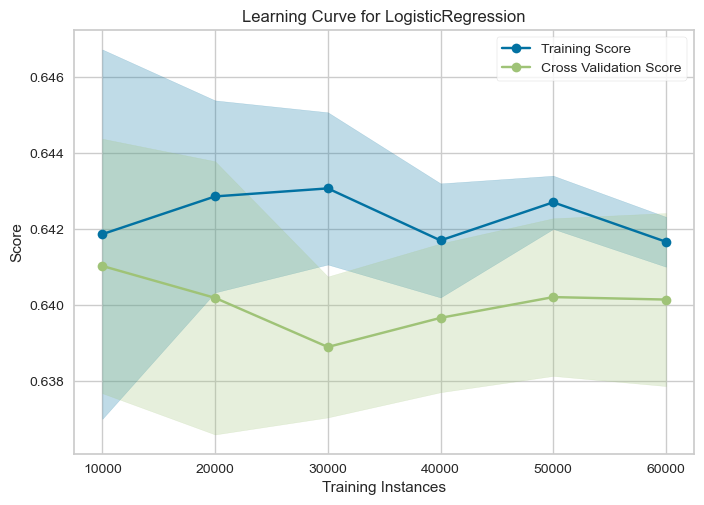

In [56]:
from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

train_sizes = ([10000,20000,30000,40000,50000, 60000])

visualizer = LearningCurve(
    model, cv=5, scoring='precision', train_sizes=train_sizes, n_jobs=4
)

visualizer.fit(X_train, y_train) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

**Interprétation:**  
- la learning curve de la cross validation avec la métrique "précision" montre une belle tendance (avec une faible variance) : notre modèle n'a pas surappris avec les données d'entrainement et est capable de généraliser = bonne convergence entre les deux courbes
- L'objectif de la learning curve est de comprendre la structure de la donnée et d'avoir un train qui baisse (elle ne surapprend pas) et un test qui augmente (ce qui montre une bonne généralisation). 
- Ne sommes-nous pas à la limite de l'underfitting car les erreurs peuvent être considérées comme grandes sur le train et sur le test => biais assez important. 

### Score sur le test

In [58]:
# score sur mon jeu de test

score = model.score(X_test,y_test)
score

0.6102697465708021

**Interprétation**  
A priori, notre modèle ne semble pas overfitter : le score en cross validation et sur le jeu de test final ne montrent pas de surapprentissage et le modèle semble bien généraliser car nous avons à peu près les mêmes scores. 
L'accuracy  mériterait toutefois d'être améliorée, notamment grâce à l'optimisation des hyperparamètres et avec un preprocessing plus élaboré. 

In [ ]:
# Reprendre le classification report

### Score sur l'ensemble du data set

In [60]:
# model.fit(X, y)

model.fit(X,y.values.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  array(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age'], dtype=object)),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  array([], dtype=object))])),
                ('logisticregression', LogisticRegression(random_state=5))])

In [61]:
model.score(X, y)

0.61320523803696

### Predict

In [62]:
# Renvoie la prediction du label en fonction de X

model.predict(X)[25]

0

In [63]:
# Renvoie une probabilité pour chaque label
# Interprétation : L'item 25 a 56% d'appartenir à la classe 0 et 43% d'appartenir à la classe 1.

model.predict_proba(X)[25]

array([0.56878449, 0.43121551])

### Sauvegarde du modèle avec Joblib

In [ ]:
##################
# CREER FONCTION
#################

In [ ]:
import joblib 

In [ ]:
# Sauvegarde du modèle sous le fichier nommé 'model_joblib'

joblib.dump(model, 'model_joblib')

In [ ]:
# Lecture du modèle enregistré dans le fichier

model_joblib = joblib.load('model_joblib')

In [ ]:
# Visualisation du modèle tel qu'il a été enregistré

model_joblib

In [ ]:
# Test de prediction ave le modèle encapsulé dans le fichier joblib

prediction_joblib = model_joblib.predict(X)
prediction_joblib

## Pistes d'amélioration pour les itérations suivantes

- Vérifier les présupposés de la régression logistique 

    Les présupposés sont : 
        - échantillon représentatif
        - absence de multicolinéarité (attention, correlation ne veut pas dire multicolinéarité)
            => Faire le VIF (si on soupçonne colinéarité) // revoir plus précisément ce point
        - normalité des résidus
        - homoscédasticité des erreurs (variance)

- Autre alternative à la vérification des présupposés : utiliser le modèle Random Forest qui est un modèle non-paramétrique => sans présupposés. Si on obtient le même score avec le Random Forest, on peut supposer que les présupposés de la régression logistique sont réunis. 

- Faire une analyse plus poussée avec Statmodel

- Effectuer un VIF pour supprimer les variables multicolinéaires

- Optimiser les paramètres avec le GridSearch CV / RandomizedSearch

- EDA pour savoir comment gérer les nombreuses variables catégorielles, effectuer du feature engiennering et savoir si je dois modifier mes données (logarithme, outliers, ...). 

- Utiliser d'autres modèles tels que le SGD Classifier qui permettra d'appliquer la descente de Gradient (plus adapatée à la taille de mon data set). 

# Itération 2

## EDA

In [14]:
# Veiller à runner les modifications faites dans data directement

df = data.copy()

In [16]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


### Analyse de forme

- Identification de la target : readmitted
- Nb lignes et colonnes : 101766 lignes et 49 colonnes
- Types de variables : 13 variables quantitatives et 36 catégorielles
- Identification des valeurs manquantes : 
    - pas bcp de colonnes avec des Nan
    - colonne "weight" >96% de Nan
    - "3 diag" à analyser pour voir s'il existe logique dans les NAN car correspondent à des diagnostiques additionnels
    - payer_code"/medical_specialty : 40% / 50% de Nan => voir si relation entre l'assurance et la spécialité du médecin

In [18]:
df.shape

(101766, 49)

In [19]:
df.dtypes.value_counts()

object    36
int64     13
dtype: int64

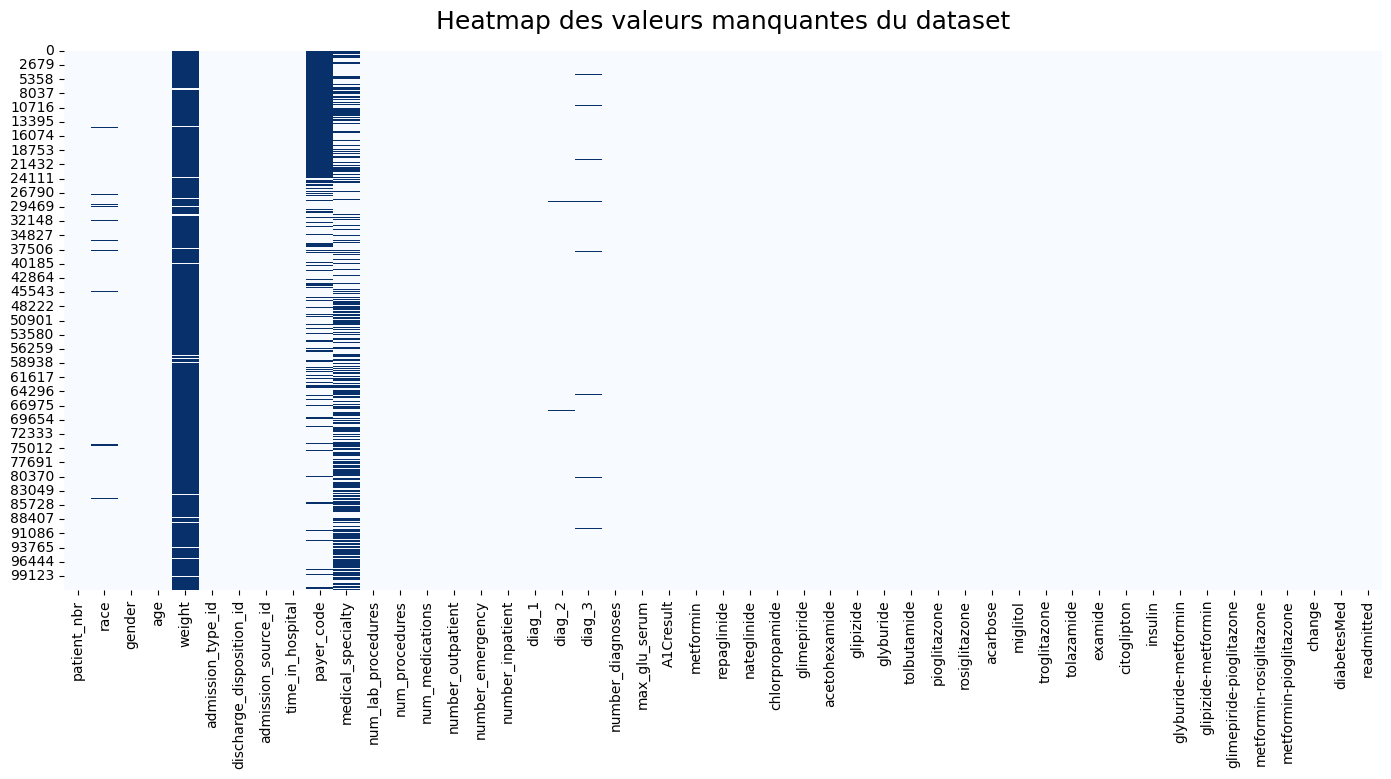

In [20]:
map_missing_values(df)

**Interprétation:**    

Valeurs manquantes (en noir):  
- Pas beaucoup de valeurs manquantes, sauf pour la colonne weight > 96% => sera sûrement à supprimer.  
- les 3 diag n'ont seulement que quelques valeurs manquantes => voir si cela est normal dans la hiérarchie et la compréhension de la variable (diag1, puis diag2 puis diag2) => dropna ?
- payer code et medical_specialty ont quasiment le même nombre de valeurs nulles => voir s'il existe une relation entre elles (quand figuration ainsi, souvent c'est qu'il y a une relation - cf. Machine Learnia)

In [21]:
check_null_values(df)

,nombre_null,%_null
weight,98569,96.9
medical_specialty,49949,49.1
payer_code,40256,39.6
race,2273,2.2
diag_3,1423,1.4
diag_2,358,0.4
diag_1,21,0.0
gender,3,0.0
patient_nbr,0,0.0
tolazamide,0,0.0


### Analyse de fond

#### Elimination des colonnes inutiles

In [22]:
# Suppression des colonnes avec valeurs nulles > 90% 

df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]

In [23]:
df.shape

(101766, 48)

In [ ]:
# On conserve le patient_nbr (id) car cela nous permettra de calculer le nombre de fois où un patient a été hospitalisé.

# Idées en vrac

- Pour le nettoyage des données : 
    - Voir comment gérer la colonne 'race' : pour le même id = pas la même race attribuée
- Feature engineering 
    - nb d'admissions par patient
    - filtrer pour n'ajouter que ceux qui ont une admission supérieure à 1 
    - nb d'admissions par patient
- Gestion des variables qualitatives 
    - cross_tab Khi 2